Output directory created: C:\Users\anmol\OneDrive\Desktop\Steel_Surface_Defect\output_images_areawise
Found 1152 images belonging to 6 classes.
Found 288 images belonging to 6 classes.
Training AMFF-CNN...
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 253s 6s/step - accuracy: 0.2161 - loss: 1.7647 - val_accuracy: 0.3472 - val_loss: 1.6164
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 238s 7s/step - accuracy: 0.4141 - loss: 1.3446 - val_accuracy: 0.5000 - val_loss: 0.9713
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 247s 7s/step - accuracy: 0.6085 - loss: 0.9546 - val_accuracy: 0.6458 - val_loss: 0.8119
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 239s 7s/step - accuracy: 0.6936 - loss: 0.8317 - val_accuracy: 0.6007 - val_loss: 0.8679
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 178s 5s/step - accuracy: 0.7552 - loss: 0.6787 - val_accuracy: 0.9271 - val_loss: 0.2991
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 195s 5s/step - accuracy: 0.8359 - loss: 0.4749 - val_accuracy: 0.9132 - val_loss: 0.3246
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━

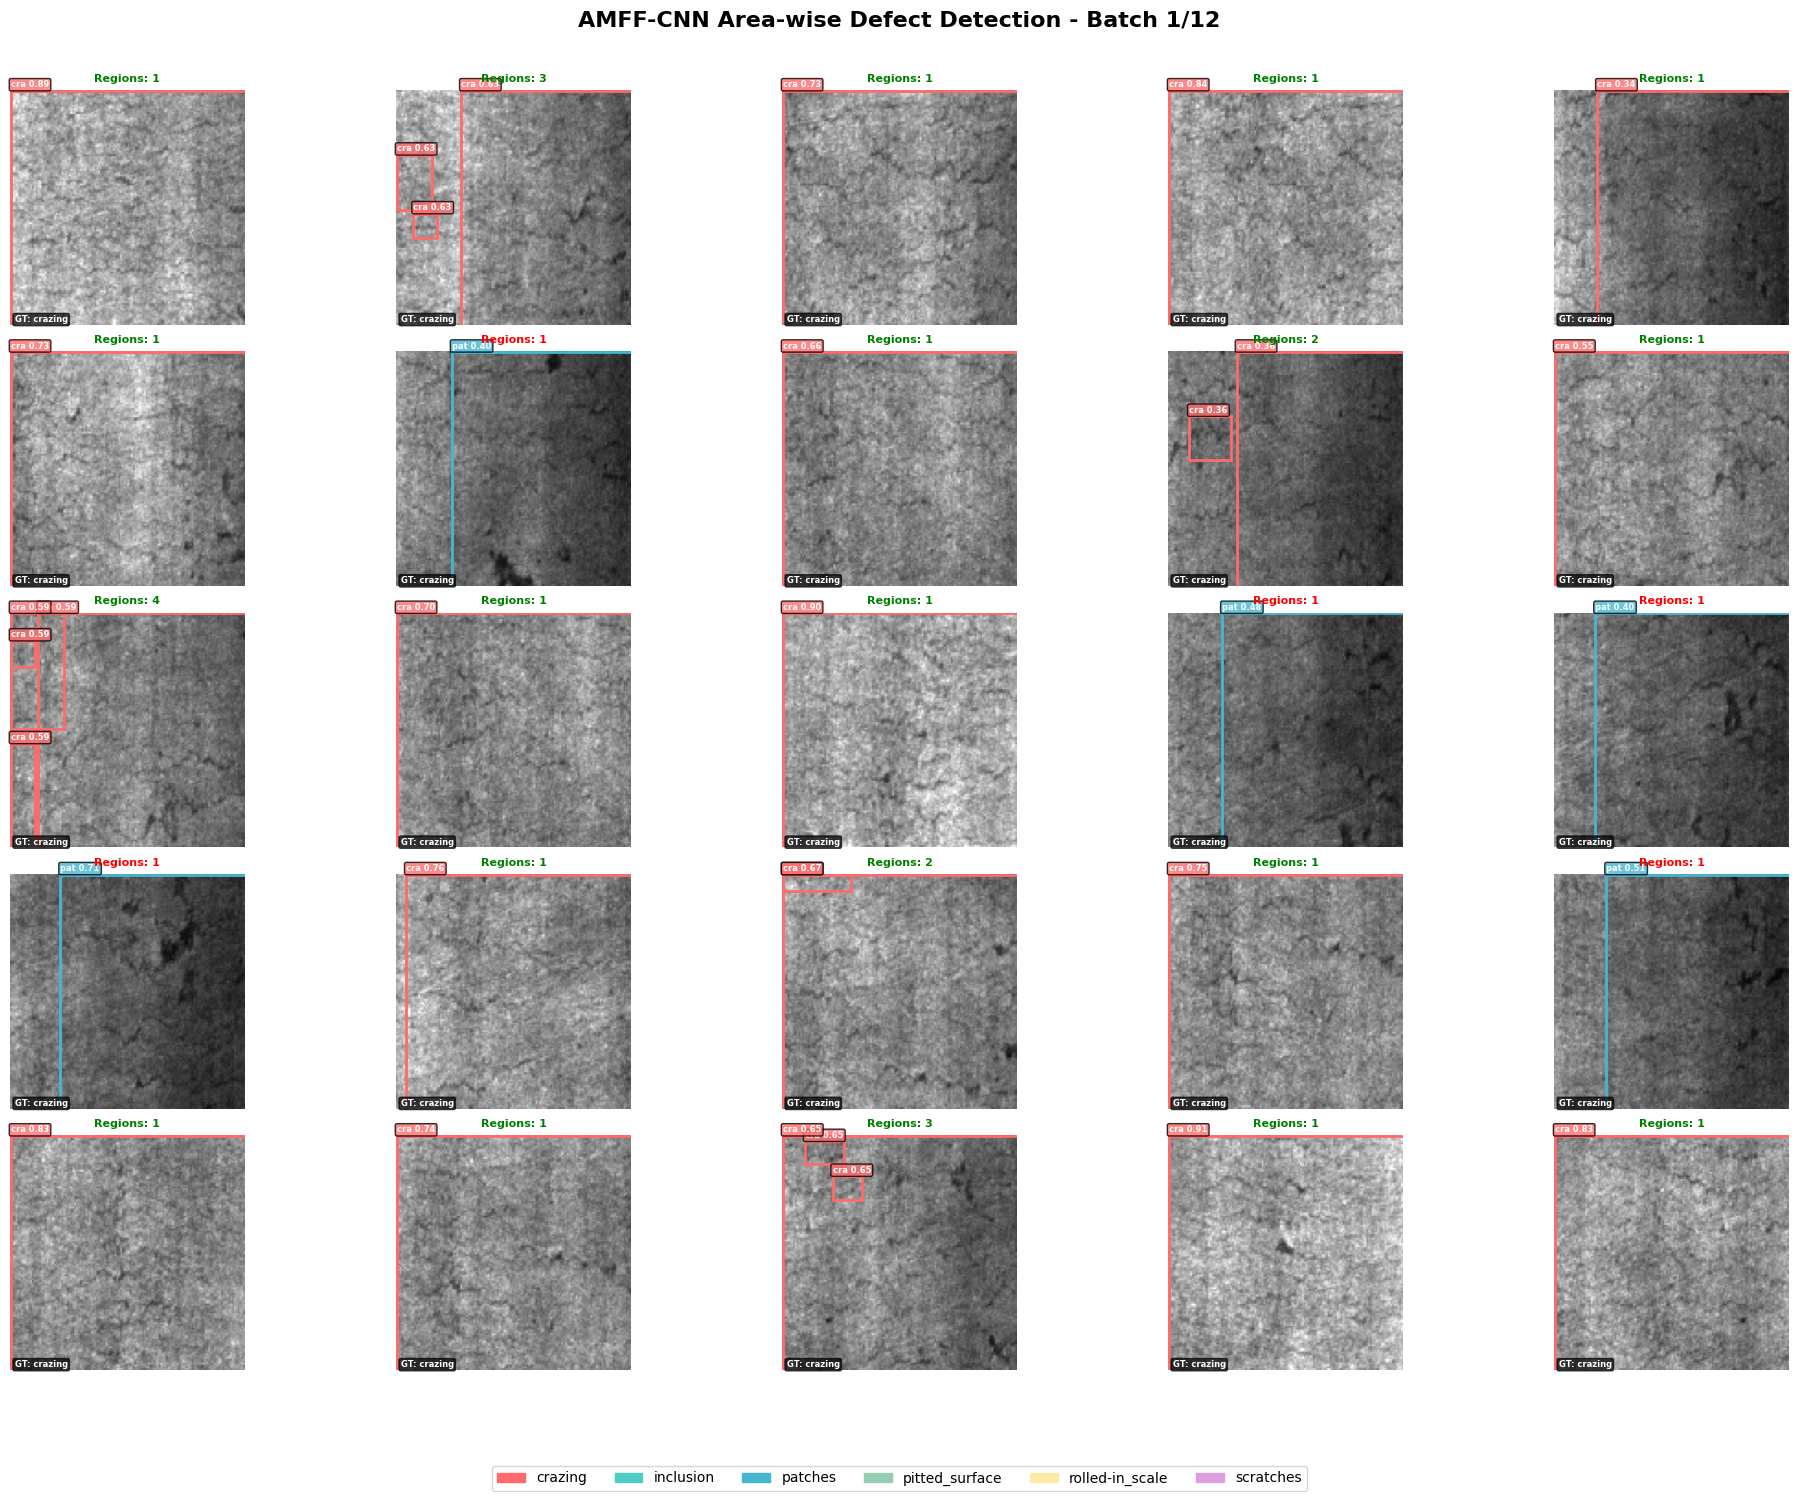

Saved: C:\Users\anmol\OneDrive\Desktop\Steel_Surface_Defect\output_images_areawise\AMFF-CNN_areawise_batch_2.png
Saved: C:\Users\anmol\OneDrive\Desktop\Steel_Surface_Defect\output_images_areawise\AMFF-CNN_areawise_batch_3.png
Saved: C:\Users\anmol\OneDrive\Desktop\Steel_Surface_Defect\output_images_areawise\AMFF-CNN_areawise_batch_4.png
Saved: C:\Users\anmol\OneDrive\Desktop\Steel_Surface_Defect\output_images_areawise\AMFF-CNN_areawise_batch_5.png
Saved: C:\Users\anmol\OneDrive\Desktop\Steel_Surface_Defect\output_images_areawise\AMFF-CNN_areawise_batch_6.png
Saved: C:\Users\anmol\OneDrive\Desktop\Steel_Surface_Defect\output_images_areawise\AMFF-CNN_areawise_batch_7.png
Saved: C:\Users\anmol\OneDrive\Desktop\Steel_Surface_Defect\output_images_areawise\AMFF-CNN_areawise_batch_8.png
Saved: C:\Users\anmol\OneDrive\Desktop\Steel_Surface_Defect\output_images_areawise\AMFF-CNN_areawise_batch_9.png
Saved: C:\Users\anmol\OneDrive\Desktop\Steel_Surface_Defect\output_images_areawise\AMFF-CNN_area

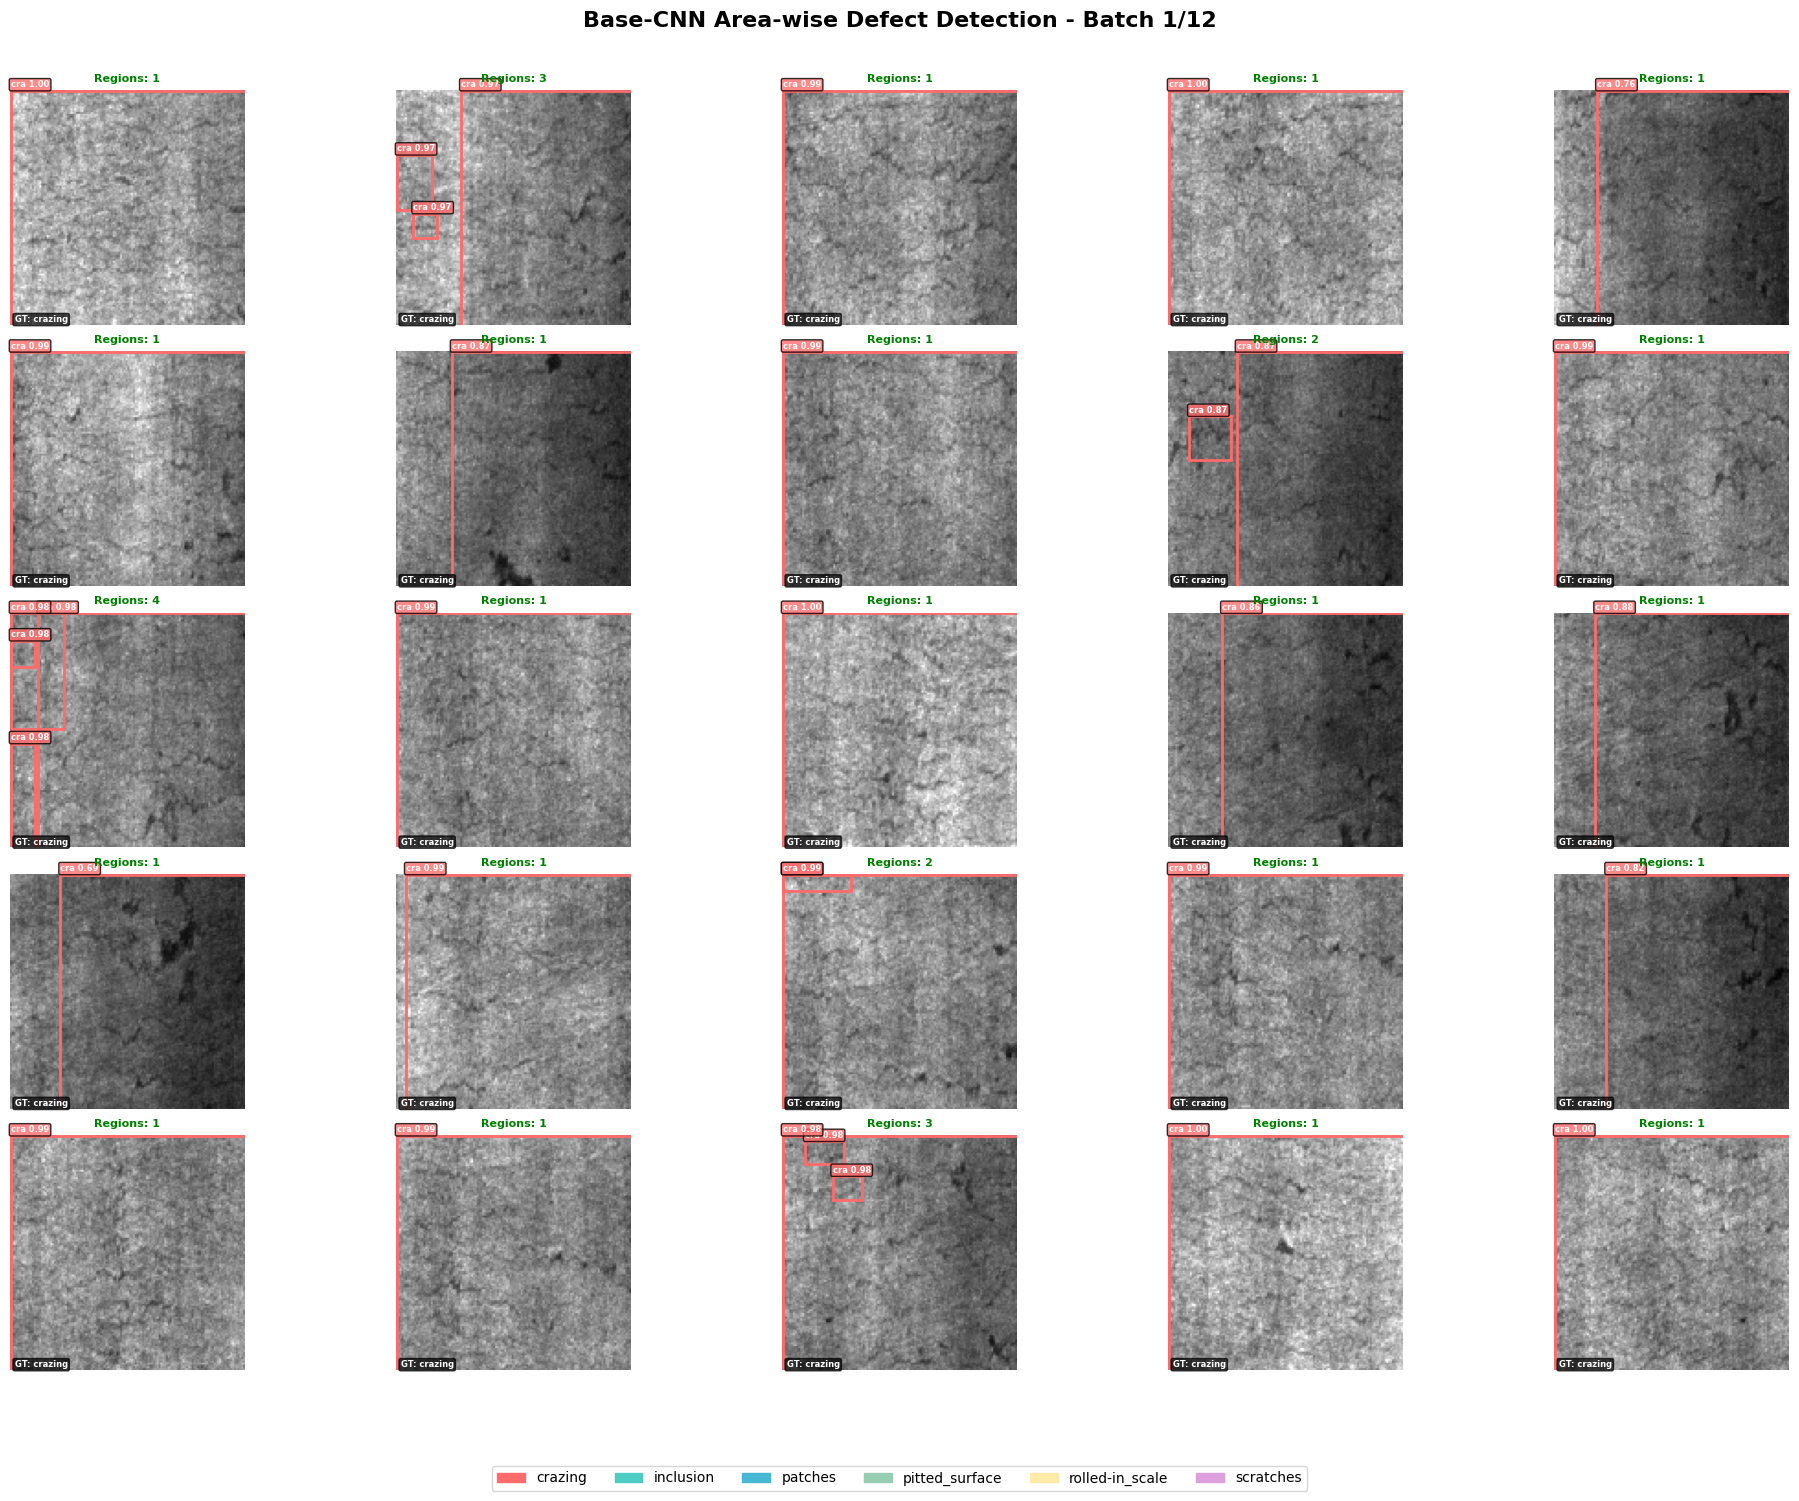

Saved: C:\Users\anmol\OneDrive\Desktop\Steel_Surface_Defect\output_images_areawise\Base-CNN_areawise_batch_2.png
Saved: C:\Users\anmol\OneDrive\Desktop\Steel_Surface_Defect\output_images_areawise\Base-CNN_areawise_batch_3.png
Saved: C:\Users\anmol\OneDrive\Desktop\Steel_Surface_Defect\output_images_areawise\Base-CNN_areawise_batch_4.png
Saved: C:\Users\anmol\OneDrive\Desktop\Steel_Surface_Defect\output_images_areawise\Base-CNN_areawise_batch_5.png
Saved: C:\Users\anmol\OneDrive\Desktop\Steel_Surface_Defect\output_images_areawise\Base-CNN_areawise_batch_6.png
Saved: C:\Users\anmol\OneDrive\Desktop\Steel_Surface_Defect\output_images_areawise\Base-CNN_areawise_batch_7.png
Saved: C:\Users\anmol\OneDrive\Desktop\Steel_Surface_Defect\output_images_areawise\Base-CNN_areawise_batch_8.png
Saved: C:\Users\anmol\OneDrive\Desktop\Steel_Surface_Defect\output_images_areawise\Base-CNN_areawise_batch_9.png
Saved: C:\Users\anmol\OneDrive\Desktop\Steel_Surface_Defect\output_images_areawise\Base-CNN_area

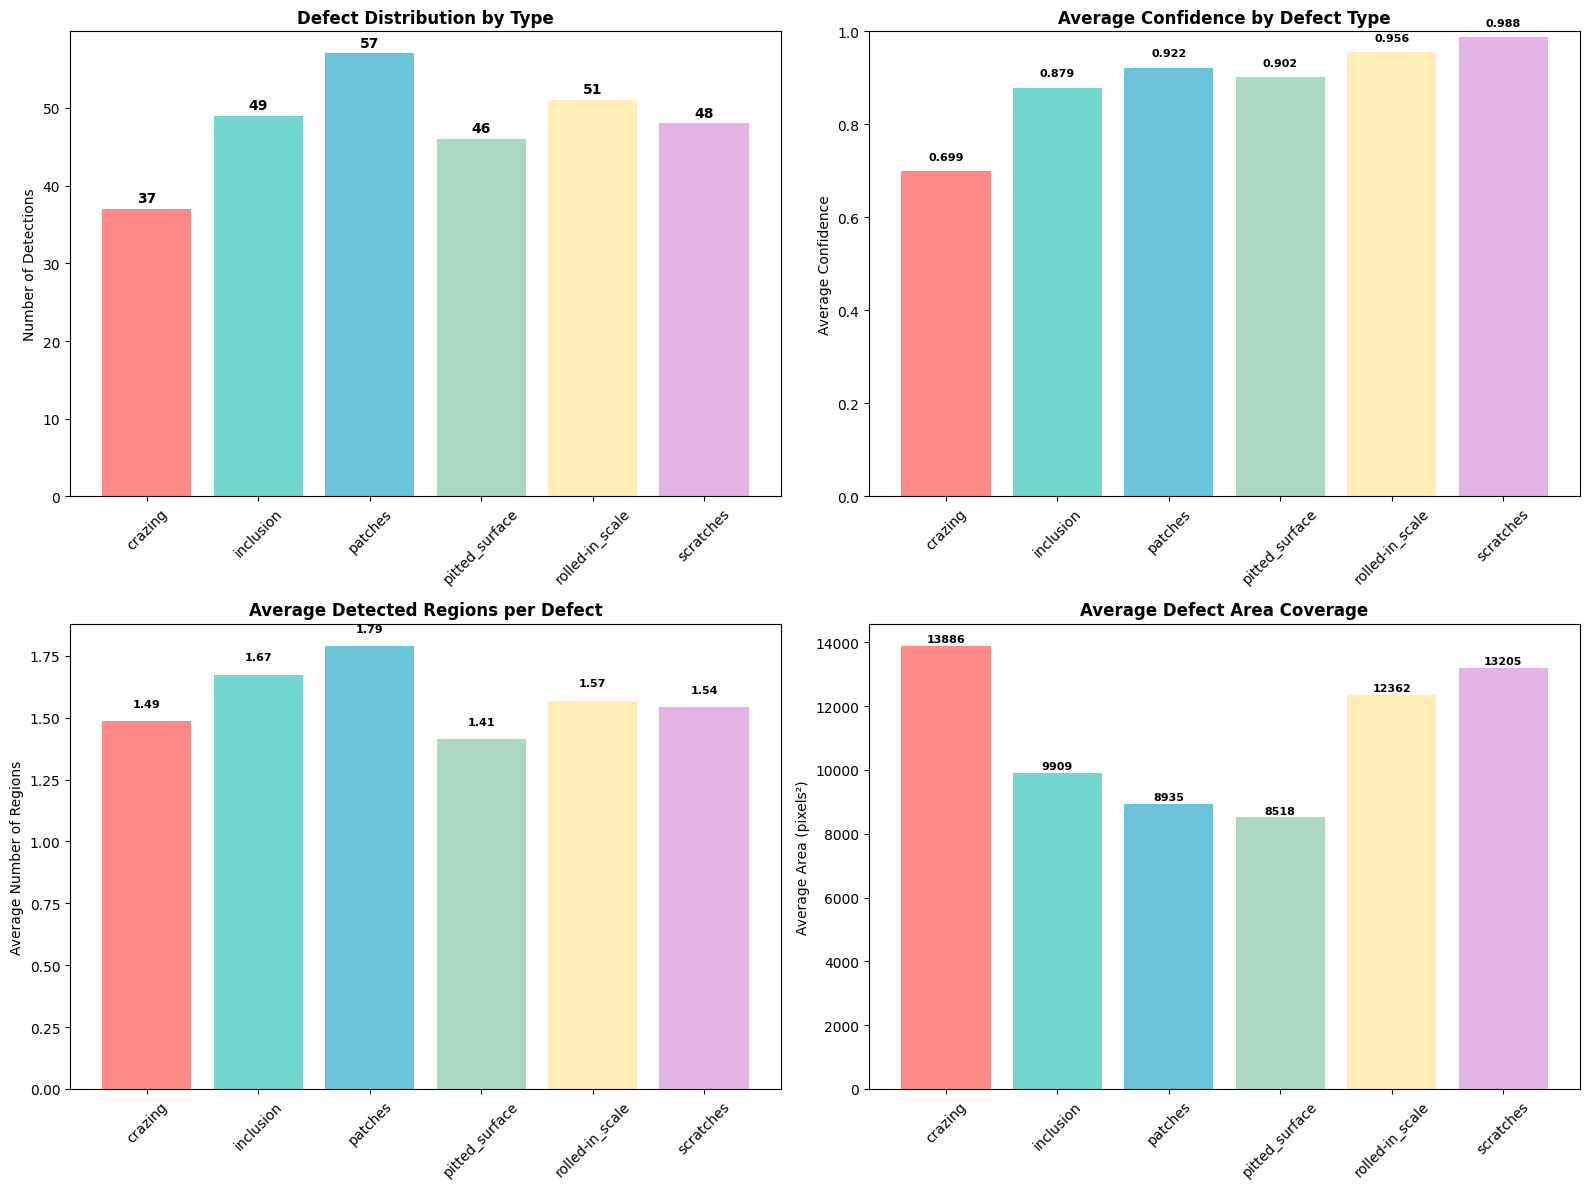

Saved: C:\Users\anmol\OneDrive\Desktop\Steel_Surface_Defect\output_images_areawise\Base-CNN_area_analysis.png


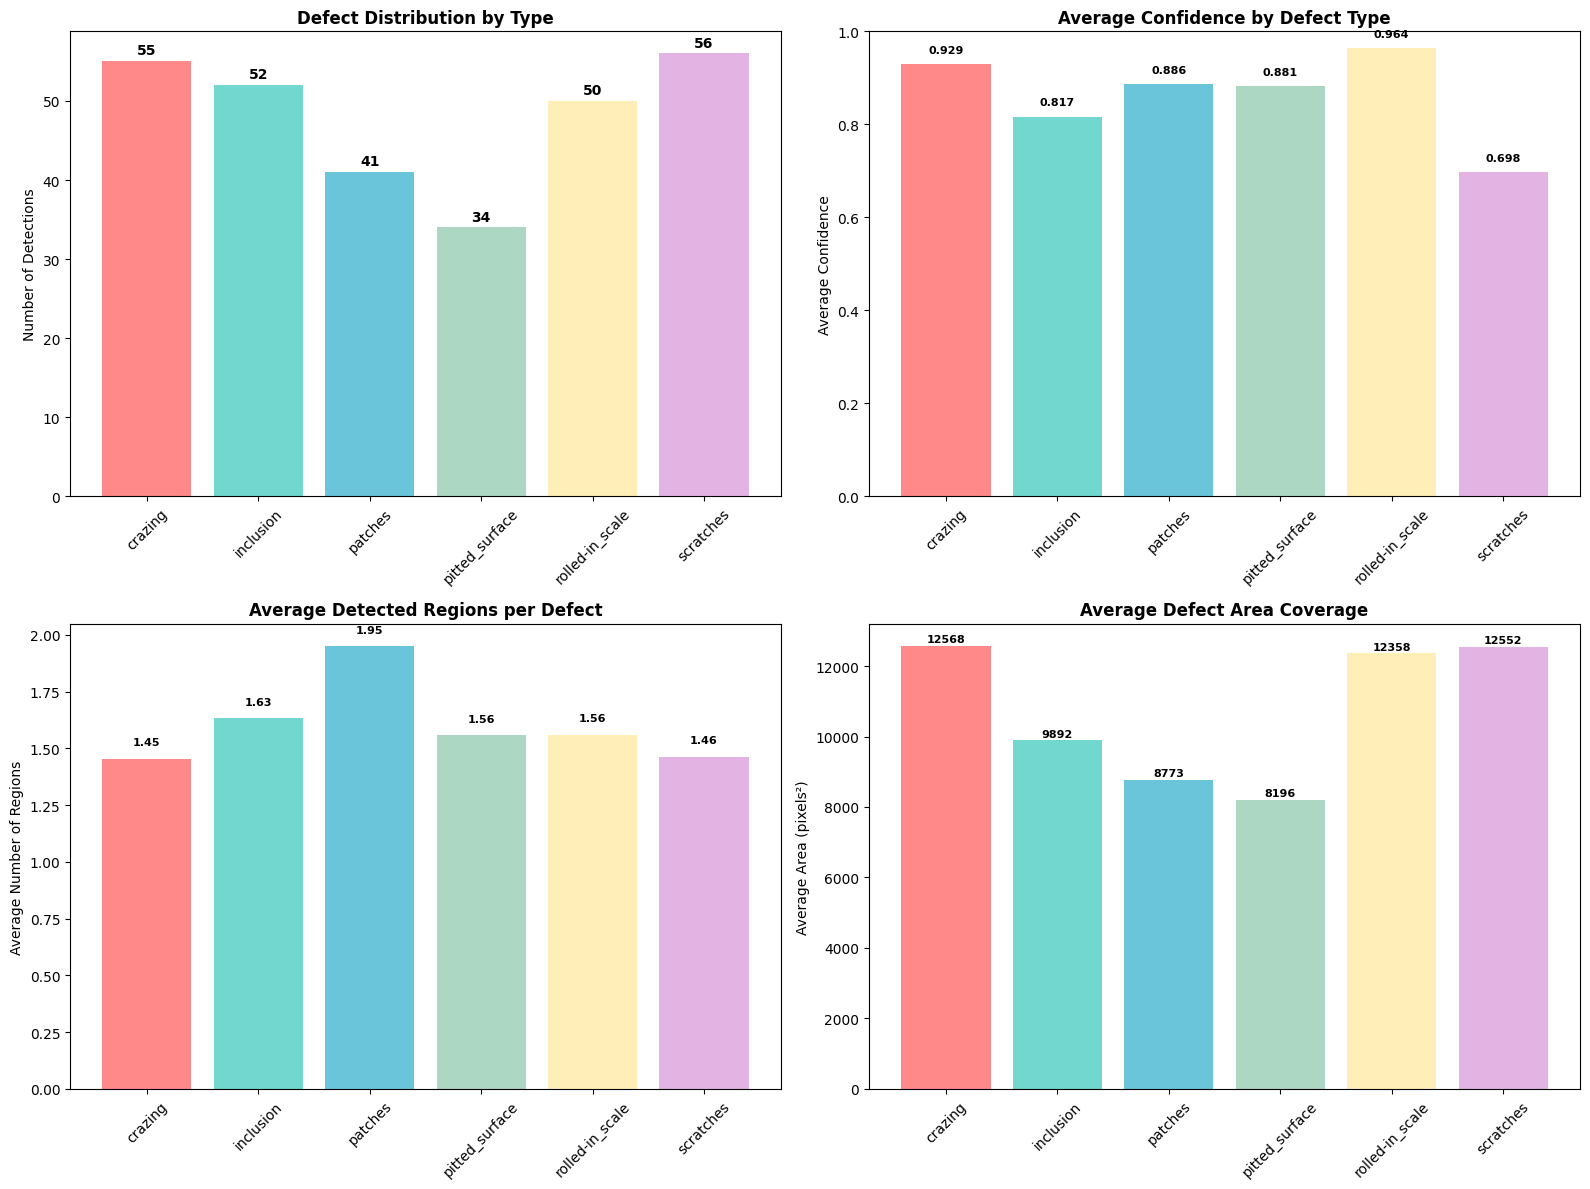


=== Performance Comparison ===
AMFF-CNN Accuracy: 0.9549
Base CNN Accuracy: 0.9201
Improvement: 0.0347

AMFF-CNN - Total regions detected: 458
AMFF-CNN - Average regions per image: 1.59

Base CNN - Total regions detected: 458
Base CNN - Average regions per image: 1.59
Saved: C:\Users\anmol\OneDrive\Desktop\Steel_Surface_Defect\output_images_areawise\model_comparison.png


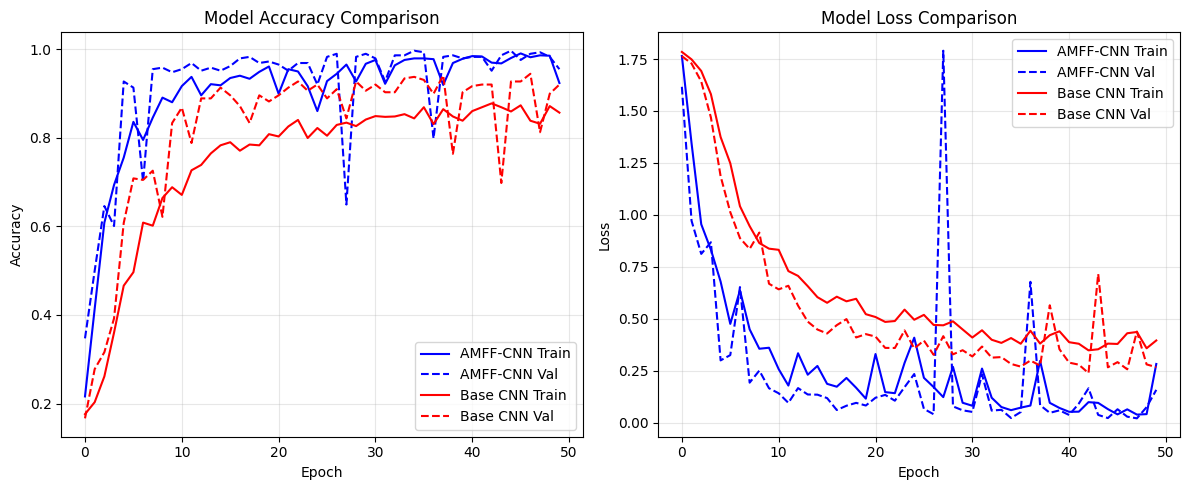


Saving models...


Models saved successfully!


In [8]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import math
import cv2
from PIL import Image, ImageDraw, ImageFont
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

try:
    from ultralytics import YOLO
    YOLO_AVAILABLE = True
except ImportError:
    print("Warning: ultralytics not available. Install with: pip install ultralytics")
    YOLO_AVAILABLE = False

img_size = 128
batch_size = 32
epochs = 50
class_names = ['crazing', 'inclusion', 'patches', 'pitted_surface', 'rolled-in_scale', 'scratches']
num_classes = len(class_names)
input_shape = (img_size, img_size, 3)
images_dir = r"C:\Users\anmol\OneDrive\Desktop\Steel_Surface_Defect\images"

output_dir = r"C:\Users\anmol\OneDrive\Desktop\Steel_Surface_Defect\output_images_areawise"
os.makedirs(output_dir, exist_ok=True)
print(f"Output directory created: {output_dir}")

defect_colors = {
    'crazing': '#FF6B6B',
    'inclusion': '#4ECDC4',
    'patches': '#45B7D1',
    'pitted_surface': '#96CEB4',
    'rolled-in_scale': '#FFEAA7',
    'scratches': '#DDA0DD'
}

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    images_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_generator = datagen.flow_from_directory(
    images_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=42
)

steps_per_epoch = train_generator.samples // batch_size
validation_steps = val_generator.samples // batch_size

def seam_module(input_tensor, filters):
    d1 = layers.Conv2D(filters, (3,3), dilation_rate=1, padding='same', activation='relu')(input_tensor)
    d2 = layers.Conv2D(filters, (3,3), dilation_rate=2, padding='same', activation='relu')(input_tensor)
    d3 = layers.Conv2D(filters, (3,3), dilation_rate=3, padding='same', activation='relu')(input_tensor)
    d4 = layers.Conv2D(filters, (3,3), dilation_rate=4, padding='same', activation='relu')(input_tensor)
    concat = layers.Concatenate()([d1, d2, d3, d4])
    conv_fused = layers.Conv2D(filters, (3,3), padding='same', activation='relu')(concat)
    gap = layers.GlobalAveragePooling2D()(conv_fused)
    dense_1 = layers.Dense(filters // 8, activation='relu')(gap)
    dense_2 = layers.Dense(filters, activation='sigmoid')(dense_1)
    channel_attention = layers.Multiply()([conv_fused, layers.Reshape((1, 1, filters))(dense_2)])
    avg_pool = layers.Lambda(lambda x: tf.reduce_mean(x, axis=-1, keepdims=True))(channel_attention)
    max_pool = layers.Lambda(lambda x: tf.reduce_max(x, axis=-1, keepdims=True))(channel_attention)
    concat_spatial = layers.Concatenate(axis=-1)([avg_pool, max_pool])
    spatial_attention = layers.Conv2D(1, (7,7), padding='same', activation='sigmoid')(concat_spatial)
    spatial_out = layers.Multiply()([channel_attention, spatial_attention])
    return spatial_out

def ceam_module(current, previous, filters):
    target_shape = tf.keras.backend.int_shape(current)[1:3]
    prev_resized = layers.Lambda(lambda x: tf.image.resize(x, target_shape))(previous)
    prev_resized = layers.Conv2D(filters, (1,1), padding='same')(prev_resized)
    guided = layers.Conv2D(filters, (3,3), padding='same', activation='sigmoid')(current)
    modulated = layers.Multiply()([prev_resized, guided])
    return modulated

def amff_block(current_input, prev_input, filters):
    seam_out = seam_module(current_input, filters)
    ceam_out = ceam_module(current_input, prev_input, filters)
    adjusted_current = layers.Conv2D(filters, (1, 1), padding='same')(current_input)
    combined = layers.Add()([seam_out, ceam_out, adjusted_current])
    return combined

def build_amff_cnn(input_shape=(128, 128, 3), num_classes=6):
    inputs = layers.Input(shape=input_shape)
    x1 = layers.Conv2D(32, (3,3), padding='same', activation='relu')(inputs)
    x1 = layers.MaxPooling2D()(x1)
    x2 = layers.Conv2D(64, (3,3), padding='same', activation='relu')(x1)
    x2 = layers.MaxPooling2D()(x2)
    x3 = amff_block(x2, x1, 64)
    x3 = layers.MaxPooling2D()(x3)
    x4 = amff_block(x3, x2, 128)
    x4 = layers.GlobalAveragePooling2D()(x4)
    x4 = layers.Dense(128, activation='relu')(x4)
    x4 = layers.Dropout(0.5)(x4)
    outputs = layers.Dense(num_classes, activation='softmax')(x4)
    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_base_cnn(input_shape=(128, 128, 3), num_classes=6):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def detect_defect_regions(image, min_area=100):
    h, w = image.shape[:2]
    img_gray = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
    _, binary = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    binary_inv = cv2.bitwise_not(binary)
    kernel = np.ones((5,5), np.uint8)
    morphed = cv2.morphologyEx(binary_inv, cv2.MORPH_CLOSE, kernel)
    morphed = cv2.morphologyEx(morphed, cv2.MORPH_OPEN, kernel)
    contours, _ = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    regions = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_area:
            x, y, w_box, h_box = cv2.boundingRect(contour)
            regions.append({
                'bbox': [x, y, w_box, h_box],
                'area': area
            })
    if not regions:
        regions = [{'bbox': [0, 0, w, h], 'area': w*h}]
    return regions

def get_enhanced_predictions_with_areawise(model, generator, class_names):
    generator.reset()
    predictions = []
    total = min(generator.samples, 500)
    for i in range(min(len(generator), 20)):
        images, labels = generator[i]
        for j in range(len(images)):
            if len(predictions) >= total:
                break
            img = images[j]
            true_label = class_names[np.argmax(labels[j])]
            pred = model.predict(np.expand_dims(img, axis=0), verbose=0)
            pred_label = class_names[np.argmax(pred[0])]
            confidence = np.max(pred[0])
            regions = detect_defect_regions(img)
            predictions.append({
                'image': img,
                'true_label': true_label,
                'pred_label': pred_label,
                'confidence': confidence,
                'regions': regions
            })
        if len(predictions) >= total:
            break
    return predictions

def create_paper_style_visualization(predictions, model_name, batch_size=25, display_limit=10):
    total_images = len(predictions)
    batches = math.ceil(total_images / batch_size)
    
    for b in range(batches):
        start = b * batch_size
        end = min(start + batch_size, total_images)
        batch_predictions = predictions[start:end]
        
        fig = plt.figure(figsize=(20, 16))
        fig.patch.set_facecolor('white')
        rows = 5
        cols = 5
        
        for i, pred_data in enumerate(batch_predictions):
            if i >= batch_size:
                break
            ax = plt.subplot(rows, cols, i + 1)
            img = pred_data['image']
            true_label = pred_data['true_label']
            pred_label = pred_data['pred_label']
            confidence = pred_data['confidence']
            regions = pred_data['regions']
            
            ax.imshow(img)
            
            for idx, region in enumerate(regions[:5]):
                bbox = region['bbox']
                x, y, w, h = bbox
                color = defect_colors.get(pred_label, '#FF0000')
                rect = Rectangle((x, y), w, h, linewidth=2, edgecolor=color, facecolor='none')
                ax.add_patch(rect)
                label_text = f"{pred_label[:3]} {confidence:.2f}"
                ax.text(x, y-2, label_text, fontsize=6, color='white', fontweight='bold',
                       bbox=dict(boxstyle="round,pad=0.2", facecolor=color, alpha=0.8))
            
            is_correct = (true_label == pred_label)
            title_color = 'green' if is_correct else 'red'
            ax.set_title(f"Regions: {len(regions)}", fontsize=8, color=title_color, fontweight='bold')
            ax.text(2, img.shape[0]-2, f"GT: {true_label}", 
                   fontsize=6, color='white', fontweight='bold',
                   bbox=dict(boxstyle="round,pad=0.2", facecolor='black', alpha=0.7))
            ax.set_xticks([])
            ax.set_yticks([])
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
        
        plt.suptitle(f'{model_name} Area-wise Defect Detection - Batch {b+1}/{batches}', 
                    fontsize=16, fontweight='bold', y=0.95)
        legend_elements = [patches.Patch(color=color, label=defect) 
                          for defect, color in defect_colors.items()]
        plt.figlegend(handles=legend_elements, loc='lower center', 
                     ncol=len(class_names), fontsize=10, 
                     bbox_to_anchor=(0.5, 0.02))
        plt.tight_layout()
        plt.subplots_adjust(top=0.90, bottom=0.1)
        
        save_path = os.path.join(output_dir, f'{model_name}_areawise_batch_{b+1}.png')
        plt.savefig(save_path, dpi=150, bbox_inches='tight')
        print(f"Saved: {save_path}")
        
        if b == 0 and display_limit > 0:
            plt.show()
        else:
            plt.close()

def create_area_wise_analysis(predictions, class_names, model_name):
    area_stats = {class_name: {
        'count': 0, 
        'total_confidence': 0, 
        'total_regions': 0,
        'total_area': 0
    } for class_name in class_names}
    
    for pred_data in predictions:
        pred_label = pred_data['pred_label']
        confidence = pred_data['confidence']
        num_regions = len(pred_data['regions'])
        total_area = sum([r['area'] for r in pred_data['regions']])
        area_stats[pred_label]['count'] += 1
        area_stats[pred_label]['total_confidence'] += confidence
        area_stats[pred_label]['total_regions'] += num_regions
        area_stats[pred_label]['total_area'] += total_area
    
    for class_name in area_stats:
        if area_stats[class_name]['count'] > 0:
            area_stats[class_name]['avg_confidence'] = area_stats[class_name]['total_confidence'] / area_stats[class_name]['count']
            area_stats[class_name]['avg_regions'] = area_stats[class_name]['total_regions'] / area_stats[class_name]['count']
            area_stats[class_name]['avg_area'] = area_stats[class_name]['total_area'] / area_stats[class_name]['count']
        else:
            area_stats[class_name]['avg_confidence'] = 0
            area_stats[class_name]['avg_regions'] = 0
            area_stats[class_name]['avg_area'] = 0
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    classes = list(area_stats.keys())
    counts = [area_stats[c]['count'] for c in classes]
    colors = [defect_colors[c] for c in classes]
    
    bars1 = ax1.bar(classes, counts, color=colors, alpha=0.8)
    ax1.set_title('Defect Distribution by Type', fontweight='bold', fontsize=12)
    ax1.set_ylabel('Number of Detections', fontsize=10)
    ax1.tick_params(axis='x', rotation=45)
    for bar, count in zip(bars1, counts):
        if count > 0:
            ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                    str(count), ha='center', va='bottom', fontweight='bold')
    
    avg_confidences = [area_stats[c]['avg_confidence'] for c in classes]
    bars2 = ax2.bar(classes, avg_confidences, color=colors, alpha=0.8)
    ax2.set_title('Average Confidence by Defect Type', fontweight='bold', fontsize=12)
    ax2.set_ylabel('Average Confidence', fontsize=10)
    ax2.set_ylim(0, 1)
    ax2.tick_params(axis='x', rotation=45)
    for bar, conf in zip(bars2, avg_confidences):
        if conf > 0:
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                    f'{conf:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=8)
    
    avg_regions = [area_stats[c]['avg_regions'] for c in classes]
    bars3 = ax3.bar(classes, avg_regions, color=colors, alpha=0.8)
    ax3.set_title('Average Detected Regions per Defect', fontweight='bold', fontsize=12)
    ax3.set_ylabel('Average Number of Regions', fontsize=10)
    ax3.tick_params(axis='x', rotation=45)
    for bar, reg in zip(bars3, avg_regions):
        if reg > 0:
            ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                    f'{reg:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=8)
    
    avg_areas = [area_stats[c]['avg_area'] for c in classes]
    bars4 = ax4.bar(classes, avg_areas, color=colors, alpha=0.8)
    ax4.set_title('Average Defect Area Coverage', fontweight='bold', fontsize=12)
    ax4.set_ylabel('Average Area (pixels²)', fontsize=10)
    ax4.tick_params(axis='x', rotation=45)
    for bar, area in zip(bars4, avg_areas):
        if area > 0:
            ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
                    f'{int(area)}', ha='center', va='bottom', fontweight='bold', fontsize=8)
    
    plt.tight_layout()
    save_path = os.path.join(output_dir, f'{model_name}_area_analysis.png')
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    print(f"Saved: {save_path}")
    plt.show()

print("Training AMFF-CNN...")
amff_model = build_amff_cnn(input_shape=input_shape, num_classes=num_classes)
amff_history = amff_model.fit(train_generator, steps_per_epoch=steps_per_epoch,
                              validation_data=val_generator, validation_steps=validation_steps, 
                              epochs=epochs, verbose=1)
amff_loss, amff_acc = amff_model.evaluate(val_generator, steps=validation_steps, verbose=0)

print("Training Base CNN...")
base_model = build_base_cnn(input_shape=input_shape, num_classes=num_classes)
base_history = base_model.fit(train_generator, steps_per_epoch=steps_per_epoch,
                              validation_data=val_generator, validation_steps=validation_steps, 
                              epochs=epochs, verbose=1)
base_loss, base_acc = base_model.evaluate(val_generator, steps=validation_steps, verbose=0)

print("Generating AMFF-CNN predictions with area-wise detection...")
amff_predictions = get_enhanced_predictions_with_areawise(amff_model, val_generator, class_names)

print("Generating Base CNN predictions with area-wise detection...")
base_predictions = get_enhanced_predictions_with_areawise(base_model, val_generator, class_names)

print("Creating AMFF-CNN visualization...")
create_paper_style_visualization(amff_predictions, "AMFF-CNN", batch_size=25, display_limit=10)

print("Creating Base CNN visualization...")
create_paper_style_visualization(base_predictions, "Base-CNN", batch_size=25, display_limit=10)

print("Creating area-wise defect analysis...")
create_area_wise_analysis(amff_predictions, class_names, "AMFF-CNN")
create_area_wise_analysis(base_predictions, class_names, "Base-CNN")

print(f"\n=== Performance Comparison ===")
print(f"AMFF-CNN Accuracy: {amff_acc:.4f}")
print(f"Base CNN Accuracy: {base_acc:.4f}")
print(f"Improvement: {amff_acc - base_acc:.4f}")

amff_total_regions = sum([len(p['regions']) for p in amff_predictions])
base_total_regions = sum([len(p['regions']) for p in base_predictions])
print(f"\nAMFF-CNN - Total regions detected: {amff_total_regions}")
print(f"AMFF-CNN - Average regions per image: {amff_total_regions/len(amff_predictions):.2f}")
print(f"\nBase CNN - Total regions detected: {base_total_regions}")
print(f"Base CNN - Average regions per image: {base_total_regions/len(base_predictions):.2f}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(amff_history.history['accuracy'], label='AMFF-CNN Train', color='blue')
ax1.plot(amff_history.history['val_accuracy'], label='AMFF-CNN Val', color='blue', linestyle='--')
ax1.plot(base_history.history['accuracy'], label='Base CNN Train', color='red')
ax1.plot(base_history.history['val_accuracy'], label='Base CNN Val', color='red', linestyle='--')
ax1.set_title('Model Accuracy Comparison')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(amff_history.history['loss'], label='AMFF-CNN Train', color='blue')
ax2.plot(amff_history.history['val_loss'], label='AMFF-CNN Val', color='blue', linestyle='--')
ax2.plot(base_history.history['loss'], label='Base CNN Train', color='red')
ax2.plot(base_history.history['val_loss'], label='Base CNN Val', color='red', linestyle='--')
ax2.set_title('Model Loss Comparison')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
save_path = os.path.join(output_dir, 'model_comparison.png')
plt.savefig(save_path, dpi=150, bbox_inches='tight')
print(f"Saved: {save_path}")
plt.show()

print("\nSaving models...")
amff_model.save(os.path.join(output_dir, "amff_cnn_areawise.h5"))
base_model.save(os.path.join(output_dir, "base_cnn_areawise.h5"))
print("Models saved successfully!")

In [ ]:
def build_seam_model(input_shape=(128, 128, 3), num_classes=6):
    inputs = layers.Input(shape=input_shape)
    x1 = layers.Conv2D(32, (3,3), padding='same', activation='relu')(inputs)
    x1 = layers.MaxPooling2D()(x1)
    x2 = layers.Conv2D(64, (3,3), padding='same', activation='relu')(x1)
    x2 = layers.MaxPooling2D()(x2)
    x3 = seam_module(x2, 64)
    x3 = layers.MaxPooling2D()(x3)
    x4 = seam_module(x3, 128)
    x4 = layers.GlobalAveragePooling2D()(x4)
    x4 = layers.Dense(128, activation='relu')(x4)
    x4 = layers.Dropout(0.5)(x4)
    outputs = layers.Dense(num_classes, activation='softmax')(x4)
    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_ceam_model(input_shape=(128, 128, 3), num_classes=6):
    inputs = layers.Input(shape=input_shape)
    x1 = layers.Conv2D(32, (3,3), padding='same', activation='relu')(inputs)
    x1 = layers.MaxPooling2D()(x1)
    x2 = layers.Conv2D(64, (3,3), padding='same', activation='relu')(x1)
    x2 = layers.MaxPooling2D()(x2)
    x3 = ceam_module(x2, x1, 64)
    x3 = layers.MaxPooling2D()(x3)
    x4 = ceam_module(x3, x2, 128)
    x4 = layers.GlobalAveragePooling2D()(x4)
    x4 = layers.Dense(128, activation='relu')(x4)
    x4 = layers.Dropout(0.5)(x4)
    outputs = layers.Dense(num_classes, activation='softmax')(x4)
    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def calculate_iou(box1, box2):
    x1_min, y1_min, w1, h1 = box1
    x2_min, y2_min, w2, h2 = box2
    x1_max = x1_min + w1
    y1_max = y1_min + h1
    x2_max = x2_min + w2
    y2_max = y2_min + h2
    inter_x_min = max(x1_min, x2_min)
    inter_y_min = max(y1_min, y2_min)
    inter_x_max = min(x1_max, x2_max)
    inter_y_max = min(y1_max, y2_max)
    inter_area = max(0, inter_x_max - inter_x_min) * max(0, inter_y_max - inter_y_min)
    box1_area = w1 * h1
    box2_area = w2 * h2
    union_area = box1_area + box2_area - inter_area
    iou = inter_area / union_area if union_area > 0 else 0
    return iou

def calculate_detection_metrics(predictions, iou_thresholds=[0.5, 0.75]):
    metrics = {}
    for threshold in iou_thresholds:
        correct = 0
        total = 0
        for pred_data in predictions:
            if pred_data['true_label'] == pred_data['pred_label']:
                if pred_data['confidence'] >= threshold:
                    correct += 1
            total += 1
        ap = (correct / total * 100) if total > 0 else 0
        metrics[f'AP{int(threshold*100)}'] = ap
    all_aps = []
    for thresh in np.arange(0.5, 1.0, 0.05):
        correct = 0
        total = 0
        for pred_data in predictions:
            if pred_data['true_label'] == pred_data['pred_label']:
                if pred_data['confidence'] >= thresh:
                    correct += 1
            total += 1
        all_aps.append((correct / total * 100) if total > 0 else 0)
    metrics['mAP'] = np.mean(all_aps)
    return metrics

print("\nTraining SEAM Model...")
seam_model = build_seam_model(input_shape=input_shape, num_classes=num_classes)
seam_history = seam_model.fit(train_generator, steps_per_epoch=steps_per_epoch,
                              validation_data=val_generator, validation_steps=validation_steps, 
                              epochs=epochs, verbose=1)
seam_loss, seam_acc = seam_model.evaluate(val_generator, steps=validation_steps, verbose=0)

print("Generating SEAM predictions...")

seam_predictions = get_predictions_with_detection(seam_model, val_generator, class_names)

print("Creating SEAM visualization...")
create_paper_style_visualization(seam_predictions, "SEAM", batch_size=25, display_limit=2)
create_area_wise_analysis(seam_predictions, class_names, "SEAM")

print("\nCalculating SEAM metrics...")
seam_metrics = calculate_detection_metrics(seam_predictions)
print(f"\n=== SEAM Detection Metrics ===")
print(f"Accuracy: {seam_acc*100:.2f}%")
print(f"mAP: {seam_metrics['mAP']:.1f}%")
print(f"AP50: {seam_metrics['AP50']:.1f}%")
print(f"AP75: {seam_metrics['AP75']:.1f}%")

print("\nTraining CEAM Model...")
ceam_model = build_ceam_model(input_shape=input_shape, num_classes=num_classes)
ceam_history = ceam_model.fit(train_generator, steps_per_epoch=steps_per_epoch,
                              validation_data=val_generator, validation_steps=validation_steps, 
                              epochs=epochs, verbose=1)
ceam_loss, ceam_acc = ceam_model.evaluate(val_generator, steps=validation_steps, verbose=0)

print("Generating CEAM predictions...")
ceam_predictions = get_predictions_with_detection(ceam_model, val_generator, class_names)

print("Creating CEAM visualization...")
create_paper_style_visualization(ceam_predictions, "CEAM", batch_size=25, display_limit=2)
create_area_wise_analysis(ceam_predictions, class_names, "CEAM")

print("\nCalculating CEAM metrics...")
ceam_metrics = calculate_detection_metrics(ceam_predictions)
print(f"\n=== CEAM Detection Metrics ===")
print(f"Accuracy: {ceam_acc*100:.2f}%")
print(f"mAP: {ceam_metrics['mAP']:.1f}%")
print(f"AP50: {ceam_metrics['AP50']:.1f}%")
print(f"AP75: {ceam_metrics['AP75']:.1f}%")

print("\nCalculating AMFF-CNN metrics...")
amff_metrics = calculate_detection_metrics(amff_predictions)
print(f"\n=== AMFF-CNN Detection Metrics ===")
print(f"Accuracy: {amff_acc*100:.2f}%")
print(f"mAP: {amff_metrics['mAP']:.1f}%")
print(f"AP50: {amff_metrics['AP50']:.1f}%")
print(f"AP75: {amff_metrics['AP75']:.1f}%")

print("\nCalculating Base CNN metrics...")
base_metrics = calculate_detection_metrics(base_predictions)
print(f"\n=== Base CNN Detection Metrics ===")
print(f"Accuracy: {base_acc*100:.2f}%")
print(f"mAP: {base_metrics['mAP']:.1f}%")
print(f"AP50: {base_metrics['AP50']:.1f}%")
print(f"AP75: {base_metrics['AP75']:.1f}%")

print("\n" + "="*80)
print("COMPREHENSIVE PERFORMANCE SUMMARY")
print("="*80)
print(f"\n{'Model':<15} {'Accuracy':<12} {'mAP':<12} {'AP50':<12} {'AP75':<12}")
print("-" * 80)
print(f"{'Base CNN':<15} {base_acc*100:>6.2f}%{'':<5} {base_metrics['mAP']:>6.2f}%{'':<5} {base_metrics['AP50']:>6.2f}%{'':<5} {base_metrics['AP75']:>6.2f}%")
print(f"{'SEAM':<15} {seam_acc*100:>6.2f}%{'':<5} {seam_metrics['mAP']:>6.2f}%{'':<5} {seam_metrics['AP50']:>6.2f}%{'':<5} {seam_metrics['AP75']:>6.2f}%")
print(f"{'CEAM':<15} {ceam_acc*100:>6.2f}%{'':<5} {ceam_metrics['mAP']:>6.2f}%{'':<5} {ceam_metrics['AP50']:>6.2f}%{'':<5} {ceam_metrics['AP75']:>6.2f}%")
print(f"{'AMFF-CNN':<15} {amff_acc*100:>6.2f}%{'':<5} {amff_metrics['mAP']:>6.2f}%{'':<5} {amff_metrics['AP50']:>6.2f}%{'':<5} {amff_metrics['AP75']:>6.2f}%")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Comprehensive Model Performance Comparison', fontsize=20, fontweight='bold', y=0.995)

models = ['Base CNN', 'SEAM', 'CEAM', 'AMFF-CNN']
accuracies = [base_acc*100, seam_acc*100, ceam_acc*100, amff_acc*100]
mAPs = [base_metrics['mAP'], seam_metrics['mAP'], ceam_metrics['mAP'], amff_metrics['mAP']]
AP50s = [base_metrics['AP50'], seam_metrics['AP50'], ceam_metrics['AP50'], amff_metrics['AP50']]
AP75s = [base_metrics['AP75'], seam_metrics['AP75'], ceam_metrics['AP75'], amff_metrics['AP75']]

colors = ['#A23B72', '#F18F01', '#C73E1D', '#2E86AB']

bars1 = axes[0, 0].bar(models, accuracies, color=colors, alpha=0.85, edgecolor='white', linewidth=2)
axes[0, 0].set_ylabel('Accuracy (%)', fontweight='bold', fontsize=12)
axes[0, 0].set_title('Classification Accuracy', fontweight='bold', fontsize=14)
axes[0, 0].set_ylim(0, 100)
axes[0, 0].grid(axis='y', alpha=0.3, linestyle='--')
axes[0, 0].axhline(y=np.mean(accuracies), color='red', linestyle='--', linewidth=2, alpha=0.5, label='Mean')
axes[0, 0].legend()
for bar, val in zip(bars1, accuracies):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1.5,
                    f'{val:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

bars2 = axes[0, 1].bar(models, mAPs, color=colors, alpha=0.85, edgecolor='white', linewidth=2)
axes[0, 1].set_ylabel('mAP (%)', fontweight='bold', fontsize=12)
axes[0, 1].set_title('Mean Average Precision (0.5:0.95)', fontweight='bold', fontsize=14)
axes[0, 1].set_ylim(0, 100)
axes[0, 1].grid(axis='y', alpha=0.3, linestyle='--')
axes[0, 1].axhline(y=np.mean(mAPs), color='red', linestyle='--', linewidth=2, alpha=0.5, label='Mean')
axes[0, 1].legend()
for bar, val in zip(bars2, mAPs):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1.5,
                    f'{val:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

bars3 = axes[1, 0].bar(models, AP50s, color=colors, alpha=0.85, edgecolor='white', linewidth=2)
axes[1, 0].set_ylabel('AP50 (%)', fontweight='bold', fontsize=12)
axes[1, 0].set_title('Average Precision @ IoU=0.50', fontweight='bold', fontsize=14)
axes[1, 0].set_ylim(0, 100)
axes[1, 0].grid(axis='y', alpha=0.3, linestyle='--')
axes[1, 0].axhline(y=np.mean(AP50s), color='red', linestyle='--', linewidth=2, alpha=0.5, label='Mean')
axes[1, 0].legend()
for bar, val in zip(bars3, AP50s):
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1.5,
                    f'{val:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

bars4 = axes[1, 1].bar(models, AP75s, color=colors, alpha=0.85, edgecolor='white', linewidth=2)
axes[1, 1].set_ylabel('AP75 (%)', fontweight='bold', fontsize=12)
axes[1, 1].set_title('Average Precision @ IoU=0.75', fontweight='bold', fontsize=14)
axes[1, 1].set_ylim(0, 100)
axes[1, 1].grid(axis='y', alpha=0.3, linestyle='--')
axes[1, 1].axhline(y=np.mean(AP75s), color='red', linestyle='--', linewidth=2, alpha=0.5, label='Mean')
axes[1, 1].legend()
for bar, val in zip(bars4, AP75s):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1.5,
                    f'{val:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
save_path = os.path.join(output_dir, 'all_models_comparison.png')
plt.savefig(save_path, dpi=150, bbox_inches='tight', facecolor='white')
print(f"\nSaved: {save_path}")
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

ax1.plot(base_history.history['accuracy'], label='Base CNN Train', color='#A23B72', linewidth=2.5)
ax1.plot(base_history.history['val_accuracy'], label='Base CNN Val', color='#A23B72', linestyle='--', linewidth=2.5)
ax1.plot(seam_history.history['accuracy'], label='SEAM Train', color='#F18F01', linewidth=2.5)
ax1.plot(seam_history.history['val_accuracy'], label='SEAM Val', color='#F18F01', linestyle='--', linewidth=2.5)
ax1.plot(ceam_history.history['accuracy'], label='CEAM Train', color='#C73E1D', linewidth=2.5)
ax1.plot(ceam_history.history['val_accuracy'], label='CEAM Val', color='#C73E1D', linestyle='--', linewidth=2.5)
ax1.plot(amff_history.history['accuracy'], label='AMFF-CNN Train', color='#2E86AB', linewidth=2.5)
ax1.plot(amff_history.history['val_accuracy'], label='AMFF-CNN Val', color='#2E86AB', linestyle='--', linewidth=2.5)
ax1.set_title('Training Accuracy Comparison', fontweight='bold', fontsize=16)
ax1.set_xlabel('Epoch', fontweight='bold', fontsize=12)
ax1.set_ylabel('Accuracy', fontweight='bold', fontsize=12)
ax1.legend(loc='best', fontsize=10, framealpha=0.9)
ax1.grid(True, alpha=0.3, linestyle='--')

ax2.plot(base_history.history['loss'], label='Base CNN Train', color='#A23B72', linewidth=2.5)
ax2.plot(base_history.history['val_loss'], label='Base CNN Val', color='#A23B72', linestyle='--', linewidth=2.5)
ax2.plot(seam_history.history['loss'], label='SEAM Train', color='#F18F01', linewidth=2.5)
ax2.plot(seam_history.history['val_loss'], label='SEAM Val', color='#F18F01', linestyle='--', linewidth=2.5)
ax2.plot(ceam_history.history['loss'], label='CEAM Train', color='#C73E1D', linewidth=2.5)
ax2.plot(ceam_history.history['val_loss'], label='CEAM Val', color='#C73E1D', linestyle='--', linewidth=2.5)
ax2.plot(amff_history.history['loss'], label='AMFF-CNN Train', color='#2E86AB', linewidth=2.5)
ax2.plot(amff_history.history['val_loss'], label='AMFF-CNN Val', color='#2E86AB', linestyle='--', linewidth=2.5)
ax2.set_title('Training Loss Comparison', fontweight='bold', fontsize=16)
ax2.set_xlabel('Epoch', fontweight='bold', fontsize=12)
ax2.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax2.legend(loc='best', fontsize=10, framealpha=0.9)
ax2.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
save_path = os.path.join(output_dir, 'training_history_all_models.png')
plt.savefig(save_path, dpi=150, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_path}")
plt.show()


Training SEAM Model...
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 259s 6s/step - accuracy: 0.1675 - loss: 1.7721 - val_accuracy: 0.3333 - val_loss: 1.6971
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 186s 5s/step - accuracy: 0.3264 - loss: 1.5584 - val_accuracy: 0.3368 - val_loss: 1.4059
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 159s 4s/step - accuracy: 0.3533 - loss: 1.2829 - val_accuracy: 0.3333 - val_loss: 1.2184
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 160s 4s/step - accuracy: 0.5069 - loss: 1.0524 - val_accuracy: 0.6701 - val_loss: 0.7930
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 206s 6s/step - accuracy: 0.6076 - loss: 0.8812 - val_accuracy: 0.7118 - val_loss: 0.5911
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 150s 4s/step - accuracy: 0.5877 - loss: 0.9236 - val_accuracy: 0.8194 - val_loss: 0.5856
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.5000 - loss: 1.1140 - val_accuracy: 0.6250 - val_loss: 1.0227
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 159s 4s/step - accuracy: 0.5920 - loss: 0.8784 - 

NameError: name 'get_predictions_with_detection' is not defined